In [0]:
!pip install dtcwt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt as pw
import dtcwt
from google.colab import drive,files

drive.mount('/gdrive')
%cd /gdrive/My\ Drive

In [0]:
fs = 256
fr = np.int(3e3)
cut = np.int(5e3)
ecg = dat.iloc[fr:cut,2]
n_lvl = 7

transform = dtcwt.Transform1d()
coefs = transform.forward(ecg, nlevels=n_lvl)

clr = [0, 1 , -2, -1]
#coefs.lowpass *= 1e0
cfs = list(coefs.highpasses)
for i in clr:
  cfs[i] *= 1e0

fig,ax = plt.subplots(n_lvl+4, 1, figsize=[30, 20])
for i in range(n_lvl):
  ax[i].plot(np.abs(coefs.highpasses[i]))
  #ax[i].plot(np.imag(coefs.highpasses[i]))
ax[n_lvl].plot(coefs.lowpass)

#cfs = tuple(cfs)
#coefs.highpasses = cfs

rec = transform.inverse(coefs)
ax[n_lvl+1].plot(ecg,'g')
ax[n_lvl+2].plot(rec,'g')
ax[n_lvl+3].plot(np.abs(rec-ecg),'y')

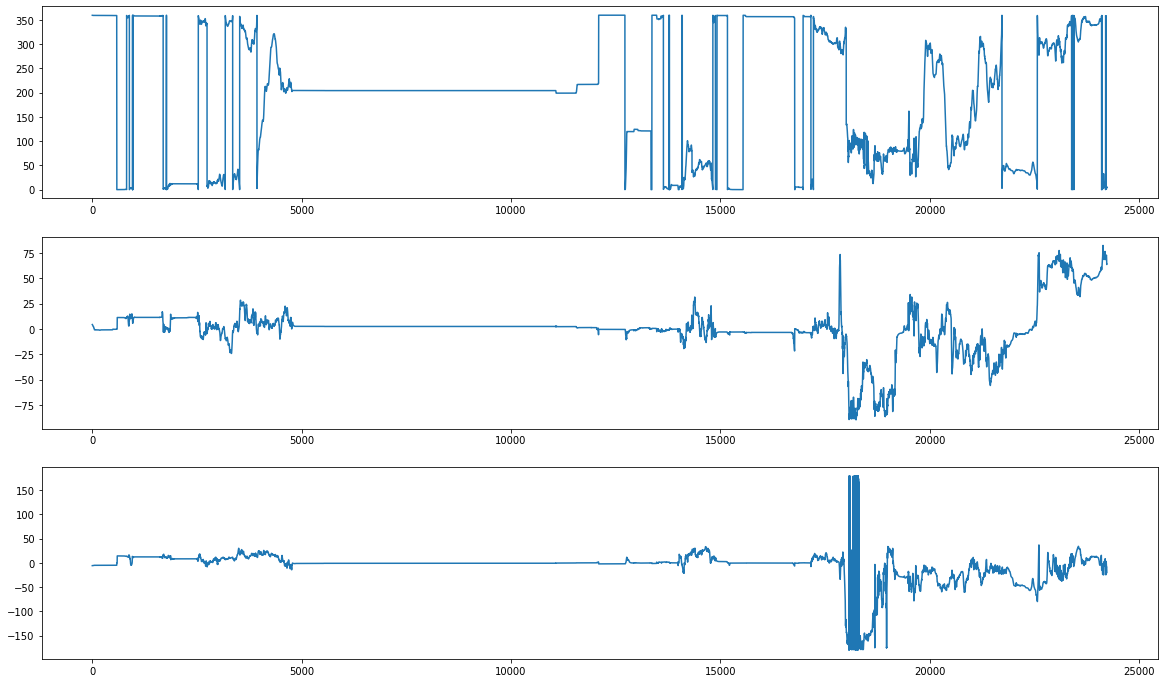

In [0]:
dat = pd.read_csv('data_31_jan - tail2.csv', sep=',', skiprows=3)
x = dat.iloc[:, 4]
y = dat.iloc[:, 5]
z = dat.iloc[:, 6]
fig,ax = plt.subplots(3,1, figsize=[20,12])
ax[0].plot(x)
ax[1].plot(y)
ax[2].plot(z)

In [0]:
#'''
dat = pd.read_csv('walk1.csv', sep=',', skiprows=3)
acc = dat.iloc[:, 2:5]
gyr = dat.iloc[:, 6:9]
mag = dat.iloc[:, 10:13]
'''
dat = pd.read_csv('walk2.csv', sep=',', skiprows=3)
acc = dat.iloc[:, 2:5]
gyr = dat.iloc[:, 5:8]
mag = dat.iloc[:, 8:11]
'''

acc = np.abs(acc) 
gyr = np.abs(gyr)
mag = np.abs(mag)

acc = acc.assign(abs = pd.DataFrame(np.linalg.norm(acc.iloc[:,0:3], axis=1)))
gyr = gyr.assign(abs = pd.DataFrame(np.linalg.norm(gyr.iloc[:,0:3], axis=1)))
mag = mag.assign(abs = pd.DataFrame(np.linalg.norm(mag.iloc[:,0:3], axis=1)))

fig,ax = plt.subplots(3,1, figsize=[20,12])

a=20
ax[0].plot(acc.iloc[:,0])
ax[0].plot(acc.iloc[:,1]+a)
ax[0].plot(acc.iloc[:,2]+a*2)

ax[1].plot(gyr.iloc[:,0])
ax[1].plot(gyr.iloc[:,1]+a*20)
ax[1].plot(gyr.iloc[:,2]+a*40)


ax[2].plot(mag.iloc[:,0])
ax[2].plot(mag.iloc[:,1])
ax[2].plot(mag.iloc[:,2])

'''
ax[0].plot(acc.iloc[:,3], 'black')
ax[1].plot(gyr.iloc[:,3], 'black')
ax[2].plot(mag.iloc[:,3], 'black')
'''

ax[0].title.set_text('walk 1 \n acc')
ax[1].title.set_text('gyr')
ax[2].title.set_text('mag')

TypeError: ignored

"\ncoef, freqs=pywt.cwt(acc.iloc[:,3], np.arange(1,10),'gaus1')\nplt.figure(figsize=[20,5])\nplt.matshow(coef, fignum=1, aspect='auto')\n"

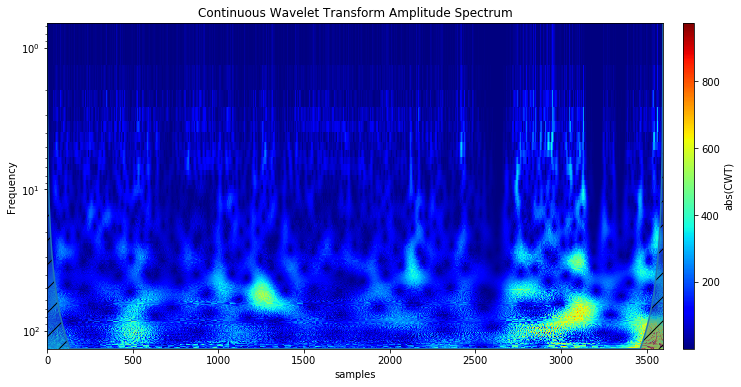

In [0]:
leng = dat.shape[0]
ax = scg.cws(np.arange(leng), gyr.iloc[:,3], np.arange(1,200), figsize=(12,6), ylabel="Frequency", xlabel='samples', yscale='log')
'''
coef, freqs=pywt.cwt(acc.iloc[:,3], np.arange(1,10),'gaus1')
plt.figure(figsize=[20,5])
plt.matshow(coef, fignum=1, aspect='auto')
'''

In [0]:
!pip install scaleogram
import scaleogram as scg
import pywt
import matplotlib.pyplot as plt
